# Generate from Unnormalized Density

In [129]:
unnormalized_density <- function(x) {
  exp(-0.5 * (x-5)^2 + sin(10* x)  ) 
}

In [130]:
rwmh <- function(n, proposal_sd, start) {
  samples <- numeric(n)
  samples[1] <- start

  for (i in 2:n) {
    current <- samples[i - 1]
    proposal <- rnorm(1, mean = current, sd = proposal_sd)

    # Compute the acceptance probability
    accept_prob <- min(1, unnormalized_density(proposal) / unnormalized_density(current))

    # Accept or reject the proposal
    if (runif(1) < accept_prob) {
      samples[i] <- proposal
    } else {
      samples[i] <- current
    }
  }

  samples
}

In [131]:
set.seed(2024)
n <- 100000
proposal_sd <- 5
start <- 0

In [132]:
samples <- rwmh(n, proposal_sd, start)

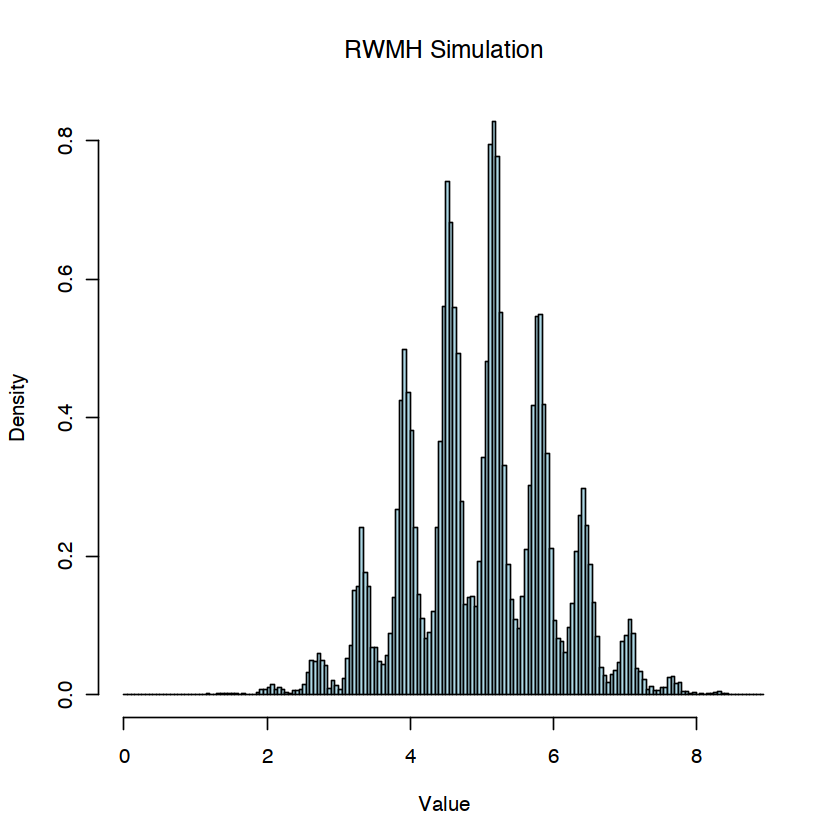

In [135]:
hist(samples, breaks = 200, probability = TRUE, col = "lightblue", border = "black", main = "RWMH Simulation", xlab = "Value")

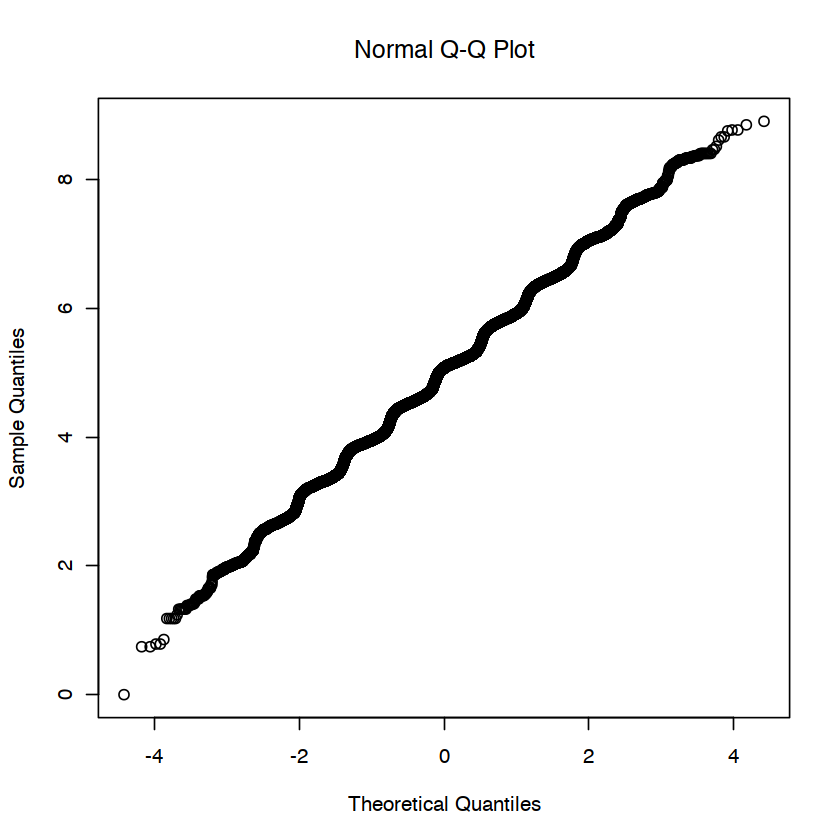

In [136]:
qqnorm(samples)

In [137]:
mean(samples)

[1] 4.985781

In [138]:
sd(samples)

[1] 1.004015

# Mixture

In [140]:
unnormalized_density <- function(x) {
  exp(-0.5 * (x-5)^2 + sin(10* x)  )  + exp(-0.5 * (x+4)^2 + cos(10* x)  ) 
}

samples <- rwmh(n, proposal_sd, start)

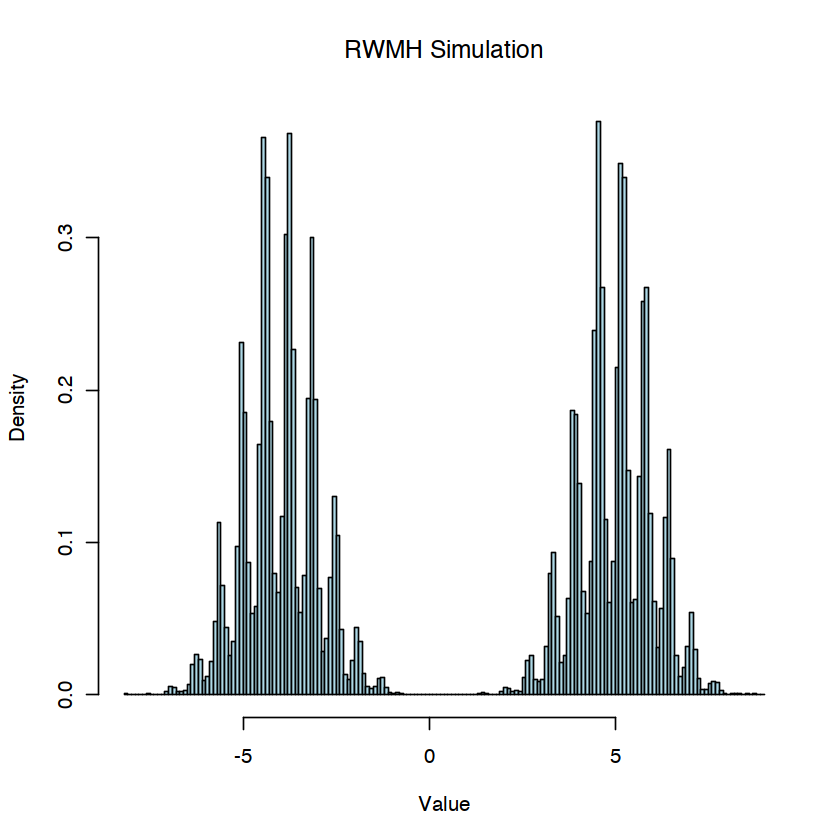

In [141]:
hist(samples, breaks = 200, probability = TRUE, col = "lightblue", border = "black", main = "RWMH Simulation", xlab = "Value")

In [142]:
mean(samples)

[1] 0.5448301

In [143]:
sd(samples)

[1] 4.611933

# Choice of Proposal

In [144]:
set.seed(2024)
n <- 100000
proposal_sd <- 0.1
start <- 0

In [145]:
unnormalized_density <- function(x) {
  exp(-0.5 * (x-5)^2 + sin(10* x)  )  + exp(-0.5 * (x+4)^2 + cos(10* x)  ) 
}

samples <- rwmh(n, proposal_sd, start)

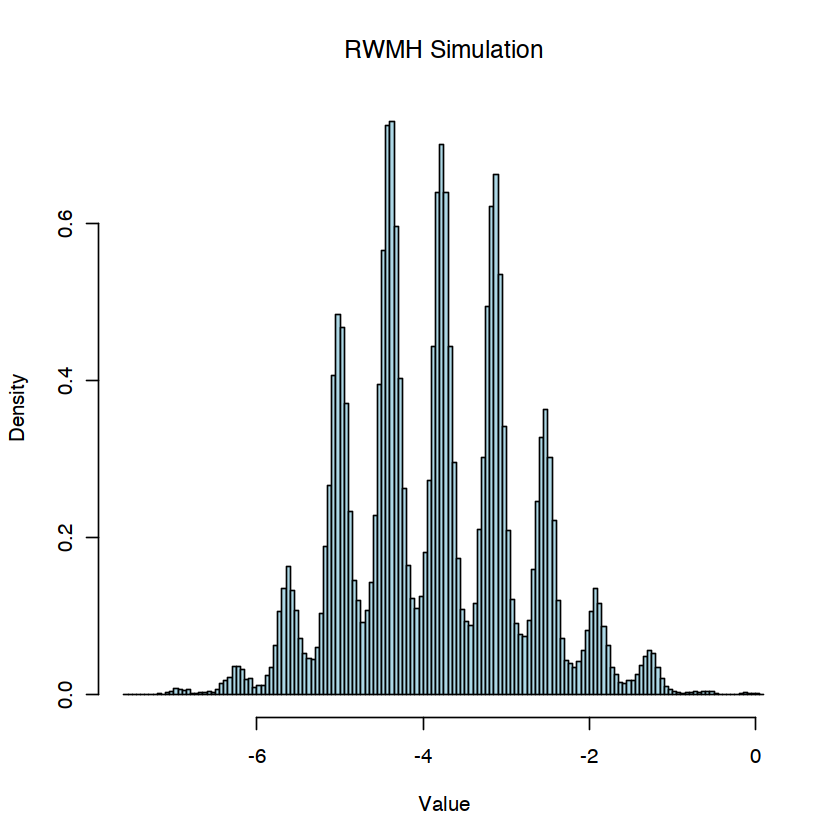

In [146]:
hist(samples, breaks = 200, probability = TRUE, col = "lightblue", border = "black", main = "RWMH Simulation", xlab = "Value")

In [147]:
mean(samples)
sd(samples)

[1] -3.845529

[1] 1.038941

In [148]:
set.seed(2024)
n <- 100000
proposal_sd <- 0.1
start <- 5

unnormalized_density <- function(x) {
  exp(-0.5 * (x-5)^2 + sin(10* x)  )  + exp(-0.5 * (x+4)^2 + cos(10* x)  ) 
}

samples <- rwmh(n, proposal_sd, start)

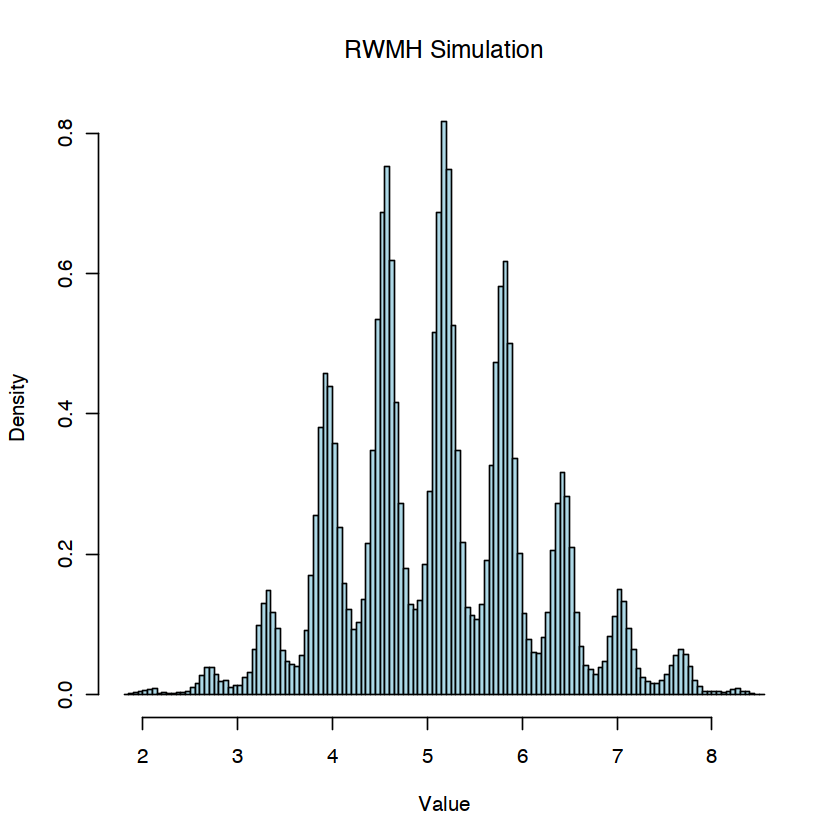

In [149]:
hist(samples, breaks = 200, probability = TRUE, col = "lightblue", border = "black", main = "RWMH Simulation", xlab = "Value")

In [150]:
mean(samples)
sd(samples)

[1] 5.111565

[1] 1.021832

You usually drop the first few hundred/thousand samples as burn-in samples, but it does not really making any difference for our case because our n is very large.